# Carregando os dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import seaborn as sns

In [2]:
%%time
transactions_2009_2010 = pd.read_excel('../online_retail_II.xlsx',sheet_name="Year 2009-2010", engine='openpyxl')
transactions_2010_2011= pd.read_excel('../online_retail_II.xlsx',sheet_name="Year 2010-2011", engine='openpyxl')

CPU times: total: 2min 13s
Wall time: 2min 29s


In [3]:
# Concatenar os DataFrames (empilhar as linhas)
df = pd.concat([transactions_2009_2010, transactions_2010_2011], ignore_index=True)

# Exibir as primeiras linhas do DataFrame combinado
print(df.shape)

(1067371, 8)


In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


([<matplotlib.axis.YTick at 0x26c2796d5e0>,
 [Text(0, 0, 'Invoice'),
  Text(0, 1, 'StockCode'),
  Text(0, 2, 'Description'),
  Text(0, 3, 'Quantity'),
  Text(0, 4, 'InvoiceDate'),
  Text(0, 5, 'Price'),
  Text(0, 6, 'Customer ID'),
  Text(0, 7, 'Country')])

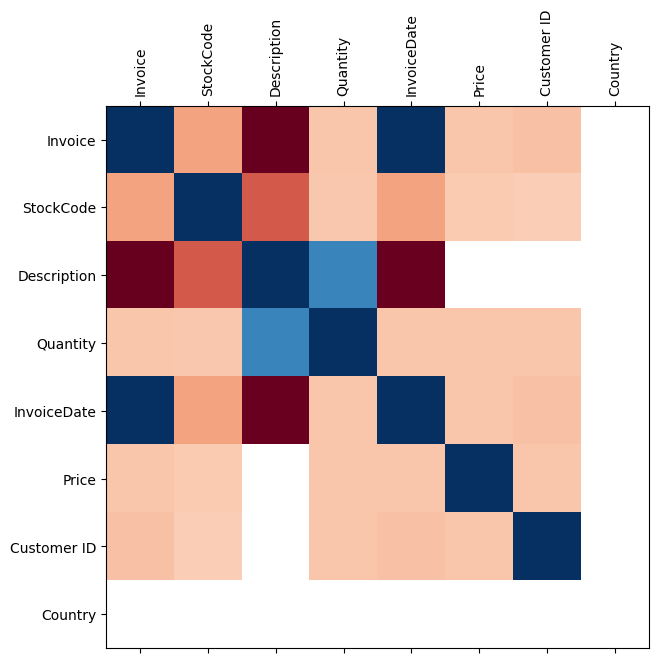

In [6]:
# Análise de correlação de dados
# Convert all columns to numeric, replacing errors with NaN
df_numeric = df.apply(pd.to_numeric, errors='coerce')
correlation = df_numeric.corr()
fig = plt.figure(figsize=(7,7))
plt.matshow(correlation, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation='vertical')
plt.yticks(range(len(correlation.columns)), correlation.columns)

# Limpeza de Dados

In [ ]:
# Verificando valores ausentes
df.isna().sum()

# Obtêm os transações canceladas
df_devolucoes = df[df['Invoice'].astype(str).str.startswith('C')==True]

print(df.head(5))

# Remove as transações canceladas
df = df[~df['Invoice'].astype(str).str.contains('C', na=False)]

# Verificando valores númericos
df['Invoice'] = pd.to_numeric(df['Invoice'], errors='coerce')

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['Description'] = df['Description'].astype(str)

# Análise de Dados Básicos

    Invoice StockCode                          Description  Quantity  \
0  489434.0     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434.0    79323P                   PINK CHERRY LIGHTS        12   
2  489434.0    79323W                  WHITE CHERRY LIGHTS        12   
3  489434.0     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434.0     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country   ano  mes  dia  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  2009   12    1   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009   12    1   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009   12    1   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  2009   12    1   
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  2009   12    1   

   hora  semana_mes  
0     7          49  
1     7          49  
2     7          49  
3     7         

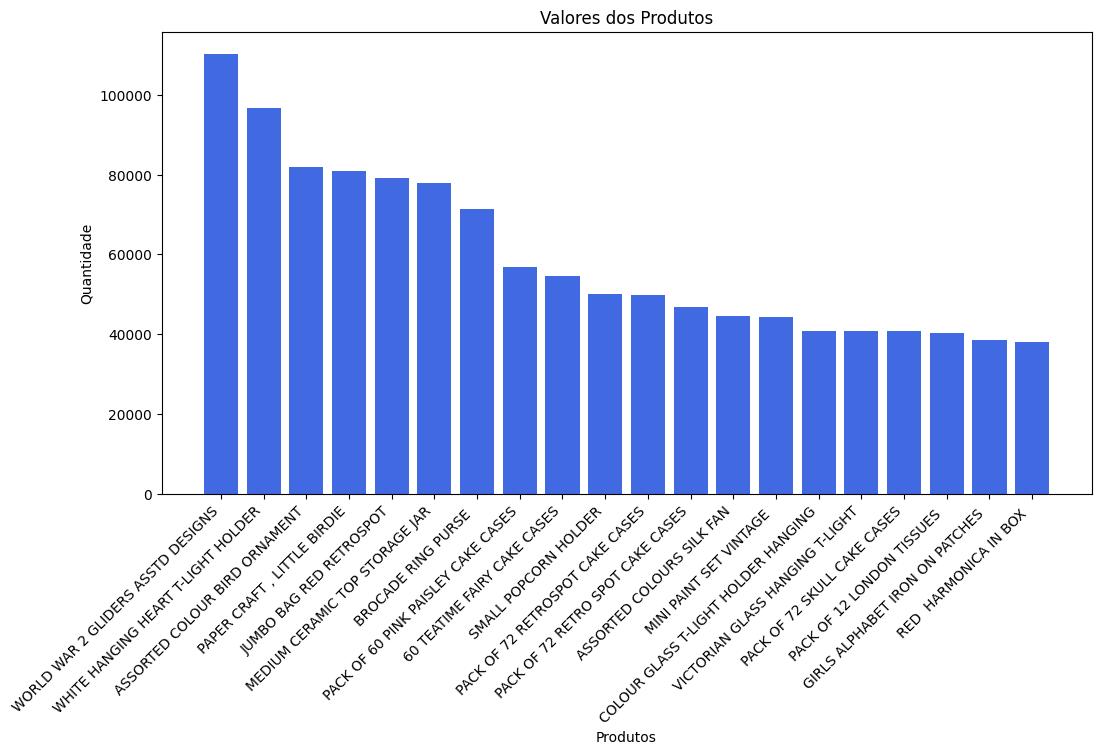

In [ ]:
# Adiciona a coluna ano
df['ano'] = df['InvoiceDate'].dt.year

df['mes'] = df['InvoiceDate'].dt.month

df['dia'] = df['InvoiceDate'].dt.day

df['hora'] = df['InvoiceDate'].dt.hour

df['semana_mes'] = df['InvoiceDate'].dt.isocalendar().week

# Agrupoar por produto e somar as quantidades vendidas
top_products = df.groupby('Description')['Quantity'].sum().reset_index()

# Ordenar do mais vendido para o menos vendido
top_products = top_products.sort_values(by='Quantity', ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_products['Description'].head(20), top_products['Quantity'].head(20), color='royalblue')
plt.xticks(rotation=45, ha='right')
# Adicionando rótulos e título
plt.xlabel("Produtos")
plt.ylabel("Quantidade")
plt.title("Valores dos Produtos")
# Exibindo o gráfico
plt.show()

334632.39


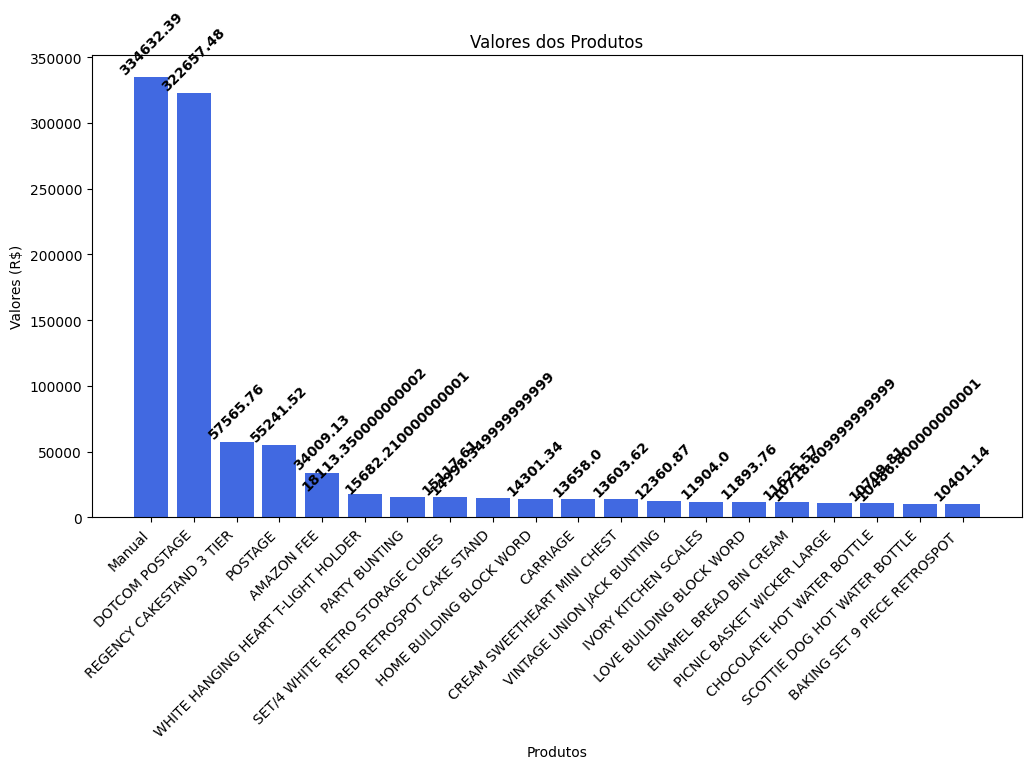

In [ ]:
# Agrupoar por produto e somar as quantidades vendidas
top_products_revenue = df.groupby('Description')['Price'].sum().reset_index()

# Ordenar do mais vendido para o menos vendido
top_products_revenue = top_products_revenue.sort_values(by='Price', ascending=False)
print(df[df['Description'] == 'Manual']['Price'].sum())

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
barras = plt.bar(top_products_revenue['Description'].head(20), top_products_revenue['Price'].head(20), color='royalblue')
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura, f'{altura}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=45)

plt.xticks(rotation=45, ha='right')
# Adicionando rótulos e título
plt.xlabel("Produtos")
plt.ylabel("Valores (R$)")
plt.title("Valores dos Produtos")
# Exibindo o gráfico
plt.show()

In [10]:
# Mostrar o total de vendas
df['Invoice'].unique().shape[0]

45331

In [11]:
# Agrupa por Invoice e soma as quantidades de cada pedido
quantidade_por_pedido = df.groupby('Invoice')['Quantity'].sum()

# Calcula a média de produtos por pedido
media_produtos_por_pedido = quantidade_por_pedido.mean()

print(f"Média de produtos por pedido: {media_produtos_por_pedido:.2f}")

Média de produtos por pedido: 244.86


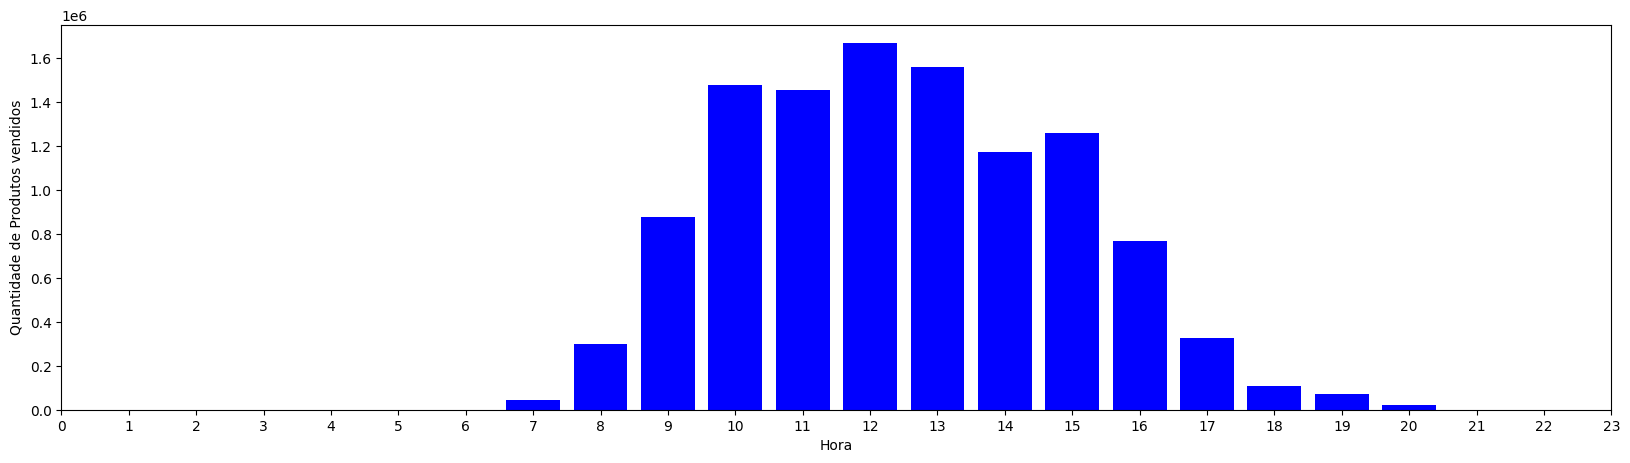

In [12]:
top_hours = df.groupby('hora')['Quantity'].sum().reset_index()

# print(top_hours.head(24))

# Qual hora do dia tem o maior número de pedidos?
plt.figure(figsize=(20,5))
plt.bar(top_hours['hora'], top_hours['Quantity'], color='blue')
plt.xticks(np.arange(0, 24, 1))
plt.xlabel('Hora')
plt.ylabel('Quantidade de Produtos vendidos')
plt.show()


# Total de vendas por tempo(diário, semanal, mensal)

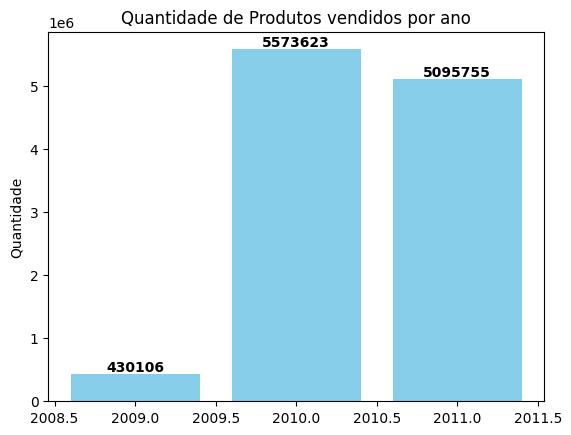

In [13]:
# Total de vendas por ano
df_by_year = df.groupby('ano', as_index=False)['Quantity'].sum()

# Criar o gráfico de barras
fig, ax = plt.subplots()
barras = ax.bar(df_by_year['ano'], df_by_year['Quantity'], color='skyblue')

# Adicionar os valores nas barras
for barra in barras:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, altura, 
            f'{altura}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Configurar rótulos e título
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de Produtos vendidos por ano')

# Mostrar o gráfico
plt.show()

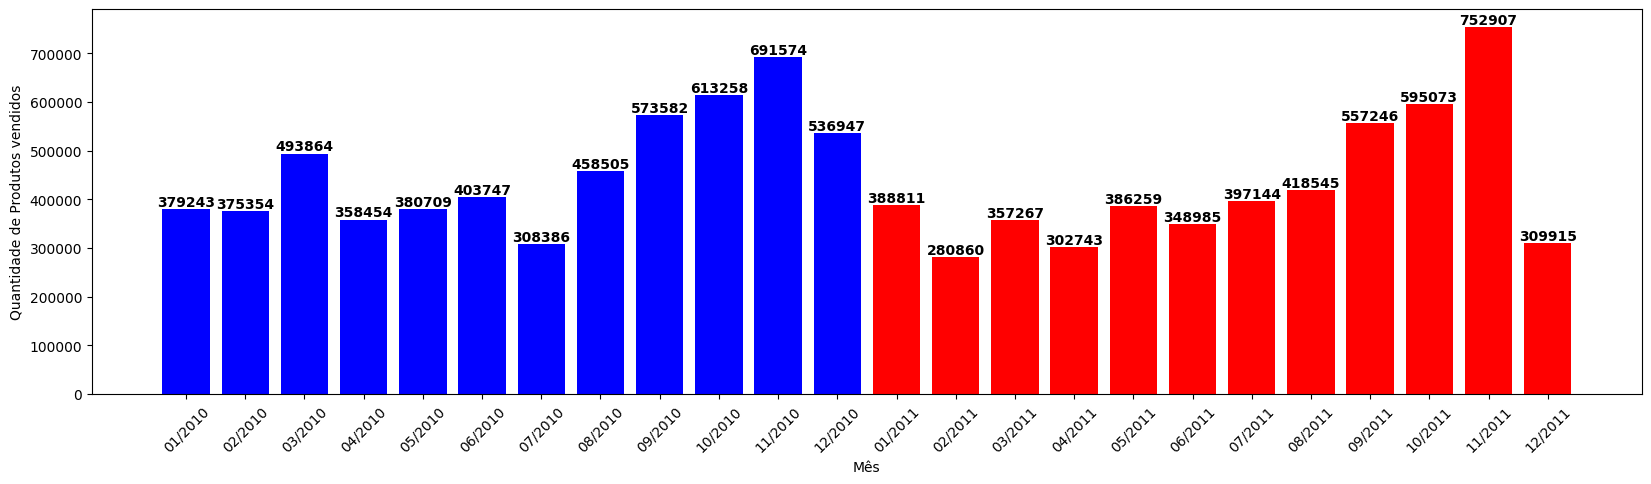

In [14]:
# Total de vendas por mês
df_by_month = df.groupby(['ano','mes'], as_index=False)['Quantity'].sum().reset_index()

df_by_month['date'] = df_by_month['mes'].astype(str).str.zfill(2) + "/" + df_by_month['ano'].astype(str)

df_by_month_2010 = df_by_month.loc[df_by_month['ano'] == 2010]

plt.figure(figsize=(20,5))
barras_2010 = plt.bar(df_by_month['date'].loc[df_by_month['ano'] == 2010], df_by_month['Quantity'].loc[df_by_month['ano'] == 2010], color='blue')
barras_2011 = plt.bar(df_by_month['date'].loc[df_by_month['ano'] == 2011], df_by_month['Quantity'].loc[df_by_month['ano'] == 2011], color='red')
for barra in barras_2010:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura, 
            f'{altura}', ha='center', va='bottom', fontsize=10, fontweight='bold')
for barra in barras_2011:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura, 
            f'{altura}', ha='center', va='bottom', fontsize=10, fontweight='bold')
# plt.xticks(np.arange(0, 13, 1))
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.ylabel('Quantidade de Produtos vendidos')
plt.show()

In [15]:
# Total de vendas semanal
df_by_week = df.groupby(['ano', 'mes', 'semana_mes'], as_index=False)['Quantity'].sum()

print(df_by_week)

      ano  mes  semana_mes  Quantity
0    2009   12          49    139921
1    2009   12          50    116800
2    2009   12          51    134263
3    2009   12          52     39122
4    2010    1           1     93386
..    ...  ...         ...       ...
116  2011   11          46    181307
117  2011   11          47    166050
118  2011   11          48     86842
119  2011   12          48     66739
120  2011   12          49    243176

[121 rows x 4 columns]


In [16]:
# Transações vendidas por dia
df_by_day = df.groupby(['ano', 'mes', 'dia'], as_index=False)['Quantity'].sum()

print(df_by_day)

      ano  mes  dia  Quantity
0    2009   12    1     24652
1    2009   12    2     30208
2    2009   12    3     47298
3    2009   12    4     21107
4    2009   12    5      5033
..    ...  ...  ...       ...
599  2011   12    5     44244
600  2011   12    6     30133
601  2011   12    7     39720
602  2011   12    8     35099
603  2011   12    9     93980

[604 rows x 4 columns]


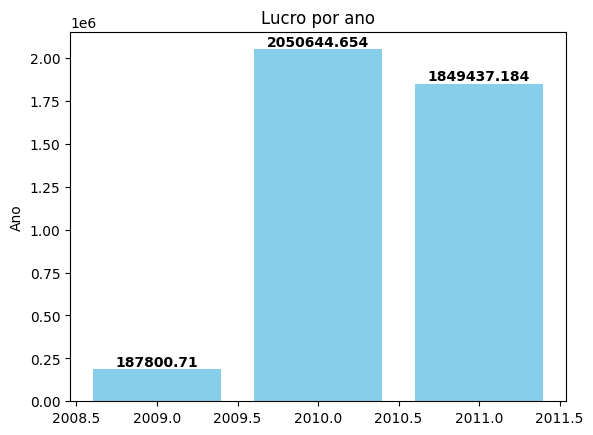

In [17]:
# Total de vendas por ano
prices_by_year = df.groupby('ano', as_index=False)['Price'].sum()

fig, ax = plt.subplots()
barras = ax.bar(prices_by_year['ano'], prices_by_year['Price'], color='skyblue')

# Adicionar os valores nas barras
for barra in barras:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, altura, 
            f'{altura}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Configurar rótulos e título
ax.set_ylabel('Ano')
ax.set_title('Lucro por ano')

# Mostrar o gráfico
plt.show()

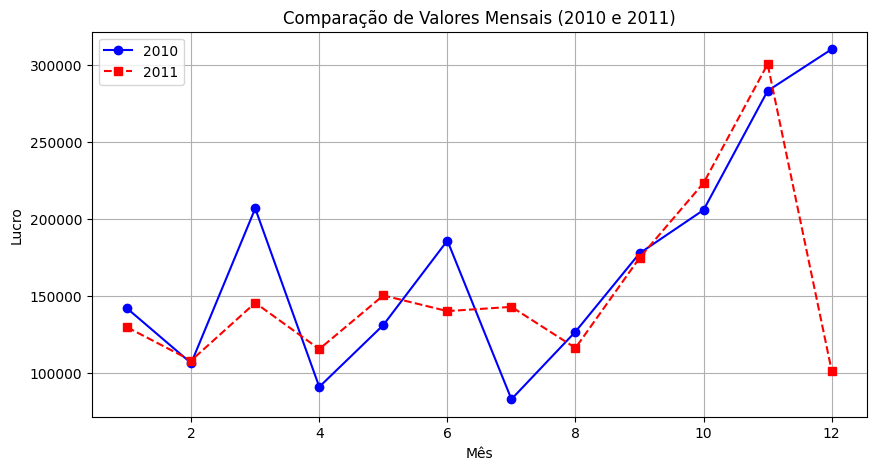

In [18]:
# Total de vendas por mês
# prices_by_month = df_filtered.groupby('mes', as_index=False)['Price'].sum()
prices_by_month = df.groupby(['ano', 'mes'], as_index=False).agg({'Price': 'sum'})

prices_by_month_filtered = prices_by_month.loc[prices_by_month['ano'] == 2011]

prices_by_month_2011 = prices_by_month[prices_by_month['ano'] == 2011]
prices_by_month_2010 = prices_by_month[prices_by_month['ano'] == 2010]

plt.figure(figsize=(10, 5))
plt.plot(prices_by_month_2010['mes'], prices_by_month_2010['Price'],  marker='o', linestyle='-', label='2010', color='blue')
plt.plot(prices_by_month_2011['mes'], prices_by_month_2011['Price'], marker='s', linestyle='--', label='2011', color='red')

plt.xlabel('Mês')
plt.ylabel('Lucro')
plt.title('Comparação de Valores Mensais (2010 e 2011)')
plt.legend()
plt.grid(True)


# Mostrar o gráfico
plt.show()

# Análise de Recorrência de Clientes

In [38]:
#  [Text(0, 0, 'Invoice'),
#   Text(0, 1, 'StockCode'),
#   Text(0, 2, 'Description'),
#   Text(0, 3, 'Quantity'),
#   Text(0, 4, 'InvoiceDate'),
#   Text(0, 5, 'Price'),
#   Text(0, 6, 'Customer ID'),
#   Text(0, 7, 'Country')

df_sorted = df.sort_values(by=['Customer ID', 'InvoiceDate'])

df_sorted['dias_entre_compras'] = df_sorted.groupby('Customer ID')['InvoiceDate'].diff().dt.days

media_dias_por_cliente = df_sorted.groupby('Customer ID')['dias_entre_compras'].mean().reset_index()
media_dias_por_cliente.rename(columns={'dias_entre_compras': 'media_dias_recompra'}, inplace=True)
print(media_dias_por_cliente.sort_values(by='media_dias_recompra', ascending=False))


      Customer ID  media_dias_recompra
5767      18174.0                596.0
4350      16737.0                524.0
5311      17715.0                392.0
718       13068.0                309.0
5673      18080.0                223.0
...           ...                  ...
5580      17986.0                  NaN
5661      18068.0                  NaN
5726      18133.0                  NaN
5777      18184.0                  NaN
5826      18233.0                  NaN

[5881 rows x 2 columns]


In [20]:
compras_por_cliente = df.groupby('Customer ID')['Invoice'].count().reset_index()
compras_por_cliente = compras_por_cliente.rename(columns={"Invoice": "qtd_compras"})
compras_por_cliente['tipo_cliente'] = compras_por_cliente['qtd_compras'].apply(
    lambda x: "recorrente" if x > 1 else "novo"
)
print(compras_por_cliente.sort_values(by='qtd_compras', ascending=False).head(5))

      Customer ID  qtd_compras tipo_cliente
5436      17841.0        12890   recorrente
2541      14911.0        11247   recorrente
400       12748.0         7230   recorrente
2239      14606.0         6566   recorrente
1732      14096.0         5111   recorrente


In [21]:
# Juntar os dois dataframes
df = df.merge(compras_por_cliente, on='Customer ID', how='left')
df = df.merge(media_dias_por_cliente, on='Customer ID', how='left')

In [22]:
clientes_total = df["Customer ID"].nunique()
clientes_recorrentes = df[df["tipo_cliente"] == "recorrente"]["Customer ID"].nunique()

taxa_retencao = (clientes_recorrentes / clientes_total) * 100
print(f"Taxa de Retenção: {taxa_retencao:.0f}%")

Taxa de Retenção: 98%


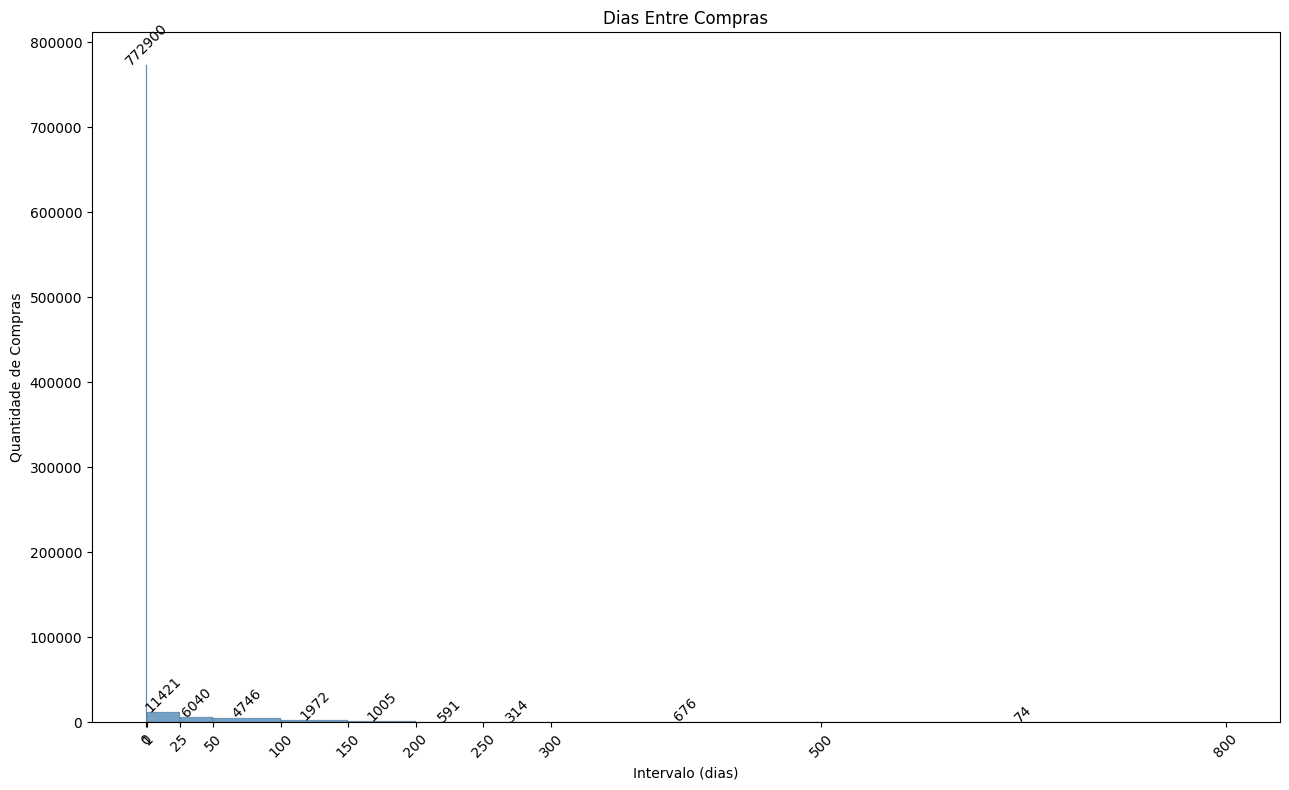

In [23]:
# Filtrar apenas clientes com mais de uma compra
dias_validos = df_sorted["dias_entre_compras"].dropna()

# print(dias_validos.sort_values(ascending=False))
plt.figure(figsize=(13, 8))

# Criar o histograma e capturar os dados do gráfico
ax = sns.histplot(dias_validos, bins=[0, 1, 25, 50, 100, 150, 200, 250, 300, 500, 800], kde=False, color='steelblue', )
# ax = sns.histplot(dias_validos, bins=[0, 1, 2, 3, 4, 5, 6], kde=False, color='steelblue')

# Adiciona os valores manualmente nas barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, height + 0.5, int(height), ha="center", rotation=45)

plt.title("Dias Entre Compras")
plt.xlabel("Intervalo (dias)")
plt.ylabel("Quantidade de Compras")
plt.xticks(ticks=[0, 1, 25, 50, 100, 150, 200, 250, 300, 500, 800], rotation=45)
plt.tight_layout()
plt.show()

Top 10 clientes mais recorrentes:
Customer ID
14911.0    398
12748.0    337
17841.0    211
15311.0    208
13089.0    203
14606.0    192
14156.0    156
17850.0    155
14646.0    152
18102.0    145
Name: Invoice, dtype: int64


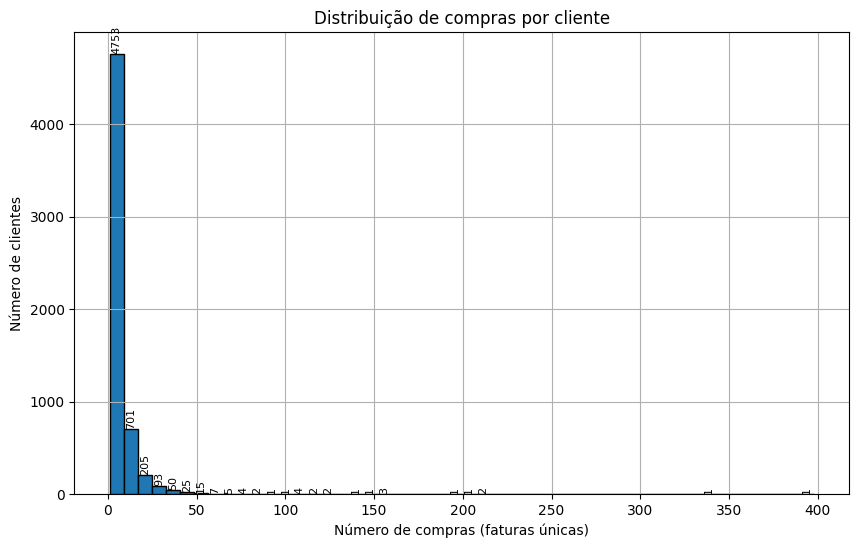

In [24]:
# Remove linhas sem Customer ID
df_clientes = df.dropna(subset=['Customer ID'])

# Conta quantas faturas (compras) cada cliente realizou
compras_por_cliente = df_clientes.groupby('Customer ID')['Invoice'].nunique()

# Exibe os top 10 clientes mais recorrentes
top_clientes = compras_por_cliente.sort_values(ascending=False).head(10)
print("Top 10 clientes mais recorrentes:")
print(top_clientes)

# Plota a distribuição
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(compras_por_cliente, bins=50, edgecolor='black')
# Adiciona rótulos em cima de cada barra
for count, bin_edge, patch in zip(n, bins, patches):
    if count > 0:
        plt.text(
            x=patch.get_x() + patch.get_width() / 2,  # centraliza no topo da barra
            y=count,
            s=f'{int(count)}',
            ha='center',
            va='bottom',
            fontsize=8,
            rotation=90,
        )
plt.title("Distribuição de compras por cliente")
plt.xlabel("Número de compras (faturas únicas)")
plt.ylabel("Número de clientes")
plt.grid(True)
plt.show()

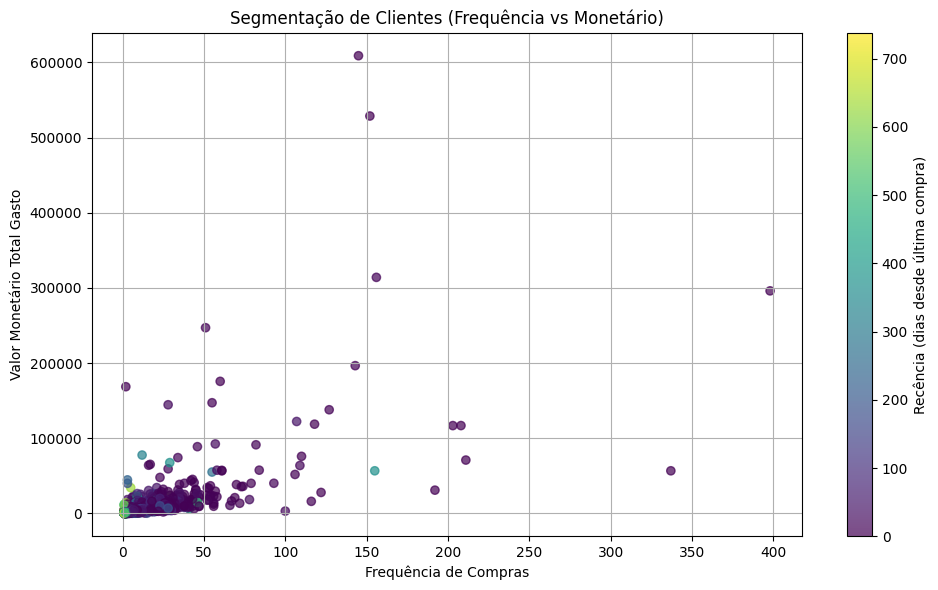

In [25]:
# Agrupa os dados por cliente
rfm = df_clientes.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,  # Recência
    'Invoice': 'nunique',                                               # Frequência
    'Price': lambda x: (x * df_clientes.loc[x.index, 'Quantity']).sum() # Monetário
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Gráfico de dispersão: Frequência x Monetário
plt.figure(figsize=(10, 6))
scatter = plt.scatter(rfm['Frequency'], rfm['Monetary'], 
                      c=rfm['Recency'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Recência (dias desde última compra)')
plt.title('Segmentação de Clientes (Frequência vs Monetário)')
plt.xlabel('Frequência de Compras')
plt.ylabel('Valor Monetário Total Gasto')
plt.grid(True)
plt.tight_layout()
plt.show()


# Devoluções

Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country, ano, mes, dia, hora, semana_mes, qtd_compras, tipo_cliente, media_dias_recompra]
Index: []
Series([], Name: Quantity, dtype: int64)
Total de registros de devoluções: 0
Clientes únicos com devoluções: 0

Top 10 produtos mais devolvidos:
Series([], Name: Quantity, dtype: int64)


IndexError: index 0 is out of bounds for axis 0 with size 0

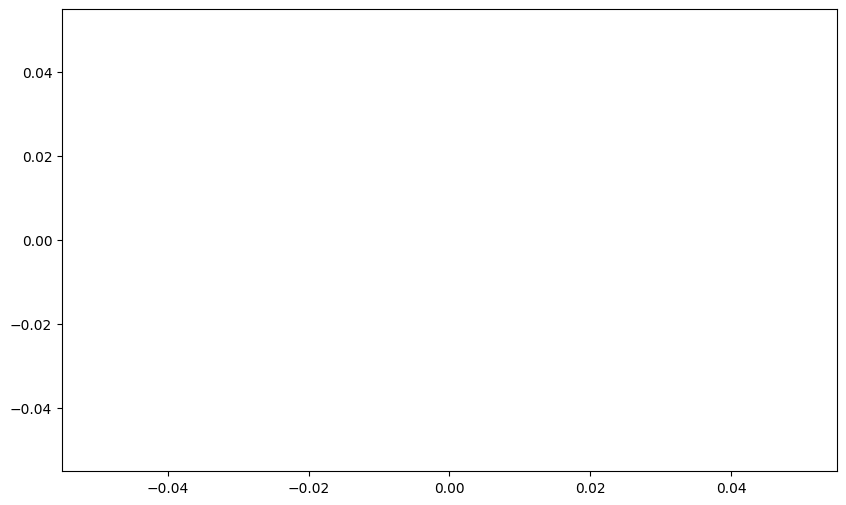

In [42]:
print(df_devolucoes.head(5))

devolucoes_por_cliente = df_devolucoes.groupby('Customer ID')['Quantity'].sum()

print(devolucoes_por_cliente.head(5))

# Total de devoluções por produto
devolucoes_por_produto = df_devolucoes.groupby('Description')['Quantity'].sum().sort_values()

# Top 10 produtos mais devolvidos
top_devolvidos = devolucoes_por_produto.head(10).abs()

# Exibe resumo
print(f"Total de registros de devoluções: {len(df_devolucoes)}")
print(f"Clientes únicos com devoluções: {df_devolucoes['Customer ID'].nunique()}")
print("\nTop 10 produtos mais devolvidos:")
print(top_devolvidos)

# Gráfico dos produtos mais devolvidos
plt.figure(figsize=(10, 6))
top_devolvidos.plot(kind='barh', color='salmon')
plt.title("Top 10 Produtos Mais Devolvidos")
plt.xlabel("Quantidade Devolvida")
plt.ylabel("Produto")
plt.tight_layout()
plt.grid(True)
plt.show()


# Em desenvolviment

In [26]:
# Tabela de recompra com checkmark
matriz_recompra = df.groupby(["Customer ID", "mes"]).size().unstack().fillna(0)
matriz_recompra = matriz_recompra.applymap(lambda x: "✓" if x > 0 else "")
print(matriz_recompra)

mes         1  2  3  4  5  6  7  8  9  10 11 12
Customer ID                                    
12346.0      ✓     ✓        ✓                 ✓
12347.0      ✓        ✓     ✓     ✓     ✓     ✓
12348.0      ✓        ✓              ✓        ✓
12349.0               ✓  ✓              ✓  ✓   
12350.0         ✓                              
...         .. .. .. .. .. .. .. .. .. .. .. ..
18283.0      ✓  ✓  ✓  ✓  ✓  ✓  ✓  ✓  ✓  ✓  ✓  ✓
18284.0                                 ✓      
18285.0         ✓                              
18286.0                           ✓           ✓
18287.0                  ✓           ✓  ✓  ✓   

[5881 rows x 12 columns]


# TODO Futuras implementações

In [27]:
# Coisas que podemos fazer
# Comparar datas da primeira compra até a compra mais recente
# df['rental_days'] = df[['rental_date', 'return_date']].apply(lambda x: (x[1] - x[0]).days, axis=1)
# Usar bokeh

In [28]:
# from bokeh.plotting import figure, output_file, show
# from bokeh.io import output_notebook